In [61]:
preds, preds_probas = [],[]
for i, row in valid_dataset.iterrows():
    query = row["clean_text"]
    pred = predict(query,model,tokenizer)
    preds_probas.append(pred)
    if pred >= 0.5:
        preds.append(1)
    else:
        preds.append(0)

In [62]:
y_true = valid_dataset.target.values
y_pred = preds

In [63]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_true, preds_probas, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_true))]
p_fpr, p_tpr, _ = roc_curve(y_true, random_probs, pos_label=1)

In [64]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_true, preds_probas)

print(auc_score)

0.8969230769230768


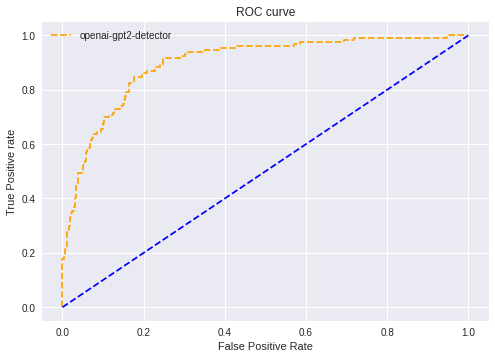

In [65]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='openai-gpt2-detector')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [67]:
import numpy as np
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), preds_probas)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = np.array([1 if i >= optimal_proba_cutoff else 0 for i in preds_probas])

In [68]:
optimal_proba_cutoff

0.14317023754119873

In [70]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred), f1_score(y_true, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.841304347826087, 0.7065217391304348
Precision Score Before and After Thresholding: 0.7766990291262136, 0.4901185770750988
Recall Score Before and After Thresholding: 0.6153846153846154, 0.9538461538461539
F1 Score Before and After Thresholding: 0.6866952789699571, 0.6475195822454308


In [71]:
print("Classification Report After Thresholding\n")
print(classification_report(y_true, roc_predictions, target_names=["n","y"]))

Classification Report After Thresholding

              precision    recall  f1-score   support

           n       0.97      0.61      0.75       330
           y       0.49      0.95      0.65       130

    accuracy                           0.71       460
   macro avg       0.73      0.78      0.70       460
weighted avg       0.84      0.71      0.72       460

